<a href="https://colab.research.google.com/github/KharlamovaAnn/AnnKharlamovaADEU/blob/main/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F%D0%9A1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Подготовка

В этом листке мы научимся базовой работе с картинками с помощью Питона. 

** Полезные ссылки **:

- <a href="https://pillow.readthedocs.io/en/5.3.x/">Документация PIL</a>
- <a href="https://matplotlib.org/users/colors.html">Цвета в matplotlib</a>

Нам понадобится библиотека *PIL*. Если вы пользуетесь Colab -- она уже установлена. Если вы пользуетесь Jupyter notebook, <a href="https://stackoverflow.com/questions/20060096/installing-pil-with-pip">вот ссылка на инструкцию.</a>

## 1. Как работать с картинками

Импортируем все необходимые библиотеки:

In [58]:
import numpy as np # библиотека для "умной" обработки многомерных массивов.
from PIL import Image
import matplotlib.pyplot as plt

Попробуем открыть картинку:

In [59]:
# Если вы пользуетесь Google Colab, нужно сначала загрузить картинку на сервер. 
# Запустите этот код и выберите картинку с компьютера.

from google.colab import files
files.upload()

Saving sibirskaja-koshka-1.jpg to sibirskaja-koshka-1 (2).jpg


{'sibirskaja-koshka-1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x08\t\x08\x06\n\t\x08\t\x0c\x0b\n\x0c\x0f\x1a\x11\x0f\x0e\x0e\x0f\x1f\x16\x18\x13\x1a%!\'&$!$#).;2),8,#$3F48=?BCB(1HMH@M;AB?\xff\xdb\x00C\x01\x0b\x0c\x0c\x0f\r\x0f\x1e\x11\x11\x1e?*$*??????????????????????????????????????????????????\xff\xc2\x00\x11\x08\x05\x13\x04\x00\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x00\x01\x02\x05\x06\x07\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xf9\x19\x0b!\x08ZY\x08B\x1b!\n!d!e\x90\x85\x16B\x11)\xa2\x99\x86\xe5\xc2\x05\x06\x9a\xb6\x8a\xad\x10\x84!d!D4ZR\xd9\n,\xb2\x88B\x16YE\x90\xb2\xca!\x0b!\x08B\x10\x84!\n!\x0b(\xb2\xc8B\x11a\x0b,\xa2\x10\x85\xa5\x16Qf\x8a,\x84!\x08B\x10\x84!\x08B\x10\x84!\xc9XY\x08B\xd3E\x10\x846B\x14Y\x08B

In [60]:
!ls

 1024px-Giovanni_Bellini_-_Allegoria_sacra.jpg	'sibirskaja-koshka-1 (1).jpg'
 downloader.py					'sibirskaja-koshka-1 (2).jpg'
 sample_data					 sibirskaja-koshka-1.jpg


In [ ]:
# Или скачайте картинки автоматически:
from requests import get
from os import system


with open("downloader.py", "wb") as f:
    f.write(get('https://wikiart_downloader.py').content)
!python downloader.py #Для Google Colab
%run -i 'downloader.py' # Для jupyter notebook

In [62]:
dir

<function dir>

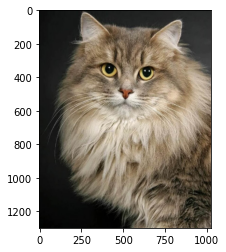

In [63]:
import cv2

img = cv2.imread('sibirskaja-koshka-1.jpg')
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

Картинка для нас -- это многомерный массив чисел. Нам нужно хранить отдельно цвет каждого пикселя, то есть нам понадобится массив размера (высота * ширина * 3), потому что цвет пикселя задаётся тремя цветами: разные компоненты отвечают за красный, синий и зелёный. Такая модель называется RGB (red-green-blue). Бывают и другие цветовые модели. Например, принтеры используют модель CMYK на основе четырёх цветов.

В этом листке мы будем пользоваться библиотекой numpy, которая позволяет эффективно работать с массивами. Синтаксис numpy отличается от обычного синтаксиса массивов. Например, получать элемент с координатами x, y, z нужно с помощью оператора [x, y, z], а не [x][y][z]:

In [64]:
python_array = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
numpy_array = np.array(python_array)
print(python_array[1][2])
print(numpy_array[1, 2])

6
6


Преобразуем нашу картинку в массив и посмотрим на её размер.

In [65]:
im=Image.open("sibirskaja-koshka-1.jpg")
im.show()

In [66]:
image_array = np.asarray(im)
print(image_array.shape)

(1299, 1024, 3)


Видим, что у нас картинка высоты 1299, ширины 1024, а каждый пиксель задаётся тремя цветами.

## 2. Подробнее о цветах

Цвет каждого пикселя задаётся тремя числами от 0 до 255 -- всего чисел 256. Каждое число характеризует насыщенность ("освещенность") красного, зелёного или синего цвета: (0, 0, 0) соответствует чёрному цвету, (255, 255, 255) -- белому, а, например, (255, 0, 0) -- красному.

### Задача 1. Палитра

Ниже реализована функция, которая позволяет нарисовать кружок данного цвета. В качестве цвета можно передавать массив из трёх элементов -- цвет точки. 

В matplotlib цвет нужно передавать не от 0 до 255, а от 0 до 1, то есть 255 будет соответствовать единице, а 0 -- нулю.

Выпишите ниже формулу, которая преобразует число от 0 до 255 в число от 0 до 1. Реализуйте соотвествующую функцию.

Формула:


<напишите тут формулу>

In [67]:
n = []
for i in range(256):
  n.append(i/255)
for index, i in enumerate(n):
  print(index, '%.3f' % i)

0 0.000
1 0.004
2 0.008
3 0.012
4 0.016
5 0.020
6 0.024
7 0.027
8 0.031
9 0.035
10 0.039
11 0.043
12 0.047
13 0.051
14 0.055
15 0.059
16 0.063
17 0.067
18 0.071
19 0.075
20 0.078
21 0.082
22 0.086
23 0.090
24 0.094
25 0.098
26 0.102
27 0.106
28 0.110
29 0.114
30 0.118
31 0.122
32 0.125
33 0.129
34 0.133
35 0.137
36 0.141
37 0.145
38 0.149
39 0.153
40 0.157
41 0.161
42 0.165
43 0.169
44 0.173
45 0.176
46 0.180
47 0.184
48 0.188
49 0.192
50 0.196
51 0.200
52 0.204
53 0.208
54 0.212
55 0.216
56 0.220
57 0.224
58 0.227
59 0.231
60 0.235
61 0.239
62 0.243
63 0.247
64 0.251
65 0.255
66 0.259
67 0.263
68 0.267
69 0.271
70 0.275
71 0.278
72 0.282
73 0.286
74 0.290
75 0.294
76 0.298
77 0.302
78 0.306
79 0.310
80 0.314
81 0.318
82 0.322
83 0.325
84 0.329
85 0.333
86 0.337
87 0.341
88 0.345
89 0.349
90 0.353
91 0.357
92 0.361
93 0.365
94 0.369
95 0.373
96 0.376
97 0.380
98 0.384
99 0.388
100 0.392
101 0.396
102 0.400
103 0.404
104 0.408
105 0.412
106 0.416
107 0.420
108 0.424
109 0.427
110 0.431


In [68]:
def get_float_color(color): # реализуйте тут функцию
    assert len(color) == 3, "Цвет должен быть массивом длины 3"
    assert 0 <= color[0] <= 255 and 0 <= color[1] <= 255 and 0 <= color[2] <= 255, "Все цвета должны быть числами от 0 до 255"
    # ваш код
    color_zero_one =1
    return color_zero_one

In [69]:
def draw_circle(color): # функция, которая рисует кружок, её изменять не надо
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.scatter([0], [0], s=10000, color=color)
    plt.show()

In [ ]:
def draw_circle((0,0,0))
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.scatter([0], [0], s=10000, color=color)
    plt.show()

In [ ]:
def draw_circle((0,0.9,0.5))
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.scatter([0], [0], s=10000, color=color)
    plt.show()

*Задание:* Нарисуйте кружки следующих цветов:

- серо-буро-малиновый
- индиго
- персиковый
- фуксия
- кирпичный

(просто подберите числа для функции draw_circle, чтобы получился примерно такой цвет).

#Серо-буро-малиновый


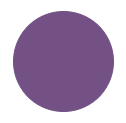

In [39]:
draw_circle((0.451,0.318,0.518))

#Индиго

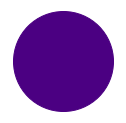

In [44]:
draw_circle((0.294,0,0.510))

#Персиковый

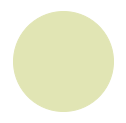

In [45]:
draw_circle((0.882,0.898,0.706))

#Фуксия

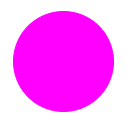

In [46]:
draw_circle((1,0,1))

#Кирпичный

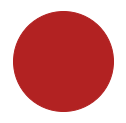

In [47]:
draw_circle((0.698,0.133,0.133))

## Задача 2. Какого цвета картинка?

Картинки часто бывают довольно разноцветные. Но что мы будем видеть, если отойдём от неё на большое расстояние? Логично предположить, что близкие пиксели для глаза будут сливаться в точку одного цвета. Наверное, цвет такой общей точки будет примерно средним арифметическим от цвета входящих в неё точек. Мы может посчитать такое среднее арифметическое отдельно по каждой компоненте цвета. Например, для цветов (0, 0, 1), (1, 1, 0) средним будет (0.5, 0.5, 0.5).

Напишите функцию, которая принимает на вход картинку и возвращает средний цвет всех пикселей этой картинки. Запустите эту функцию от картинки выше ("Sacred Allegory" Джованни Беллини).


In [48]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=e05a1f26ca16f4056fa4f6040cb14e9cefeaf3ee840e8e8263307ead72326f79
  Stored in directory: /root/.cache/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


In [49]:
import wikipedia

In [50]:
wikipedia.set_lang("en")
from IPython.display import Image
from IPython.core.display import HTML
page=wikipedia.page(title="Sacred Allegory",pageid=None,auto_suggest=True,redirect=True,preload=True)
print(page.url)

https://en.wikipedia.org/wiki/Holy_Allegory


In [52]:
from google.colab import files
files.upload()

Saving 1024px-Giovanni_Bellini_-_Allegoria_sacra.jpg to 1024px-Giovanni_Bellini_-_Allegoria_sacra.jpg


{'1024px-Giovanni_Bellini_-_Allegoria_sacra.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00x\x00x\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x060\n(\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\x07\x08\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf9\x9dM\x02H\xb5!$\x83b\xe5\x85I\x02\xe5@\xb6\xa6\xc3\xa5\xa3\x8f\xa1\xadG\x9f@[T\xa0\xd4(\xb6B\x1aA5v-\x06\xa7i6\xd4\xb2\x93%\x18\xd7v\x96\x9bU%\xb0\xea\x82\xc6\xc1\x0c\xa0s\x04\x95b8\xba\xa1\xc2\xa1A\x85\x90U\x10K\xba\\

In [53]:
!ls

 1024px-Giovanni_Bellini_-_Allegoria_sacra.jpg	'sibirskaja-koshka-1 (1).jpg'
 downloader.py					 sibirskaja-koshka-1.jpg
 sample_data


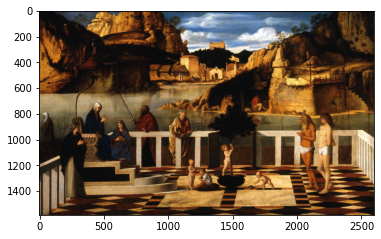

In [54]:
import cv2

img=cv2.imread("1024px-Giovanni_Bellini_-_Allegoria_sacra.jpg")
img_cvt=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [55]:
from PIL import Image
image=Image.open("1024px-Giovanni_Bellini_-_Allegoria_sacra.jpg")
w,h=image.size
pixel=[]
for x in range(w):
  for y in range(h):
    r,g,b=image.getpixel((x,y))
    pixel.append([r,g,b])
avg=[sum(x)//len(x) for x in zip(*pixel)]
print(" ".join(str(x) for x in avg))


97 72 47


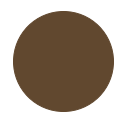

In [56]:
draw_circle((0.380,0.282,0.184))